https://medium.com/@CallMeTwitch/building-a-neural-network-zoo-from-scratch-the-long-short-term-memory-network-1cec5cf31b7

In [17]:
import torch, os
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(os.path.join('data_processing','media','airline-passengers.csv'), index_col=0, parse_dates=True)
df.head()
df.columns

Index(['Passengers'], dtype='object')

[1.13571573e+02 1.66786442e+00 6.93318314e-03]


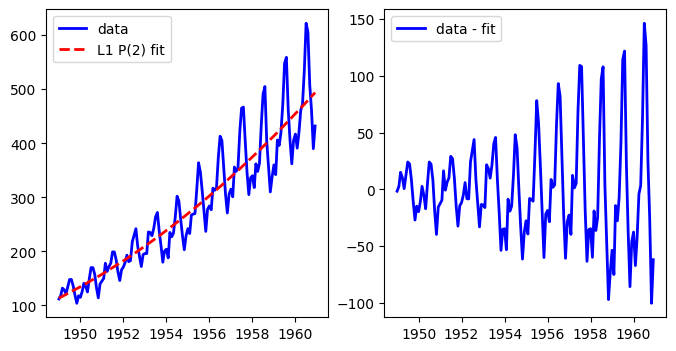

In [105]:
timeseries  = torch.tensor(df["Passengers"].values, dtype = torch.float)
from sklearn import linear_model
regr3 = linear_model.Lasso(alpha=0.05, fit_intercept=False)
phi = torch.ones(len(timeseries), 3)
phi[:,1] = torch.arange(len(timeseries))
phi[:,2] = torch.arange(len(timeseries))**2
regr3.fit(phi, timeseries)  
a3 = regr3.coef_
print(a3)
fit = phi @ a3 
#ax = df.plot(y="Passengers")
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax = ax.flatten()

ax[0].plot(df.index, df["Passengers"], color='blue', linestyle='-', linewidth=2, label='data')
ax[0].plot(df.index, fit.numpy(), color='red', linestyle='--', linewidth=2, label='L1 P(2) fit')
ax[0].legend()

ax[1].plot(df.index, df["Passengers"]-fit.numpy(), color='blue', linestyle='-', linewidth=2, label='data - fit')
ax[1].legend()

In [54]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)


cut_idx = int(len(timeseries)*0.67)

train, test = timeseries[:cut_idx], timeseries[cut_idx:]
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95]) torch.Size([95])
torch.Size([47]) torch.Size([47])
